In [51]:

import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [52]:
!pip install miditime

from miditime.miditime import MIDITime

# Instantiate the class with a tempo (120bpm is the default) and an output file destination.
mymidi = MIDITime(90, 'myfile.mid')

In [68]:
def map_value(value, min_value, max_value, min_result, max_result):
    result = min_result + (value - min_value) / (max_value - min_value) * (max_result - min_result)
    return result

In [53]:
# Definición de la función "mag_to_pitch_tuned()"
def mag_to_pitch_tuned(magnitude):
    """Dónde se encuentra este punto de datos en el dominio de sus datos?
    (I.E. el min magnitude es 3, el max in 5.6).
    En este caso la opción 'True' significa que la escala está invertida,
    por lo que el valor más alto devolverá el porcentaje más bajo."""

    # Escala lineal, orden inverso
    scale_pct = mymidi.linear_scale_pct(0, 100, magnitude)

    # Encuentra la nota que coincide con tu punto de datos
    note = mymidi.scale_to_note(scale_pct, ["C", "D", "E", "F", "G", "A", "B"])

    # Traduce esa nota a un tono MIDI
    midi_pitch = mymidi.note_to_midi_pitch(note)

    return midi_pitch

In [54]:
# Mount Google Drive on Colab (if the file is in your Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your CSV file in Google Drive
archivo_csv = '/content/datos_luminosidad_contraste.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(archivo_csv)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
data.columns

Index(['Tiempo (segundos)', 'Luminosidad', 'Contraste'], dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tiempo (segundos)  1768 non-null   datetime64[ns]
 1   Luminosidad        1768 non-null   float64       
 2   Contraste          1768 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 41.6 KB


In [65]:
data.isna().sum()

Tiempo (segundos)    0
Luminosidad          0
Contraste            0
dtype: int64

In [66]:
data.describe()

,Luminosidad,Contraste
count,1768.000000,1768.000000
mean,15.632777,28.349045
std,12.196645,12.160083
min,0.000000,0.000000
25%,5.561750,18.596250
50%,12.649000,30.037000
75%,22.179250,38.474000
max,50.656000,47.685000


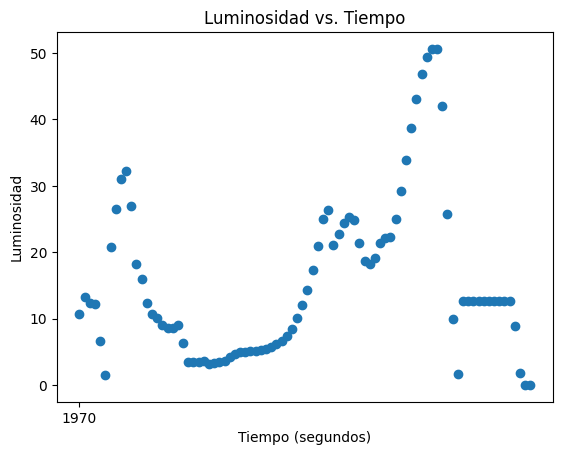

In [67]:
plt.scatter(data['Tiempo (segundos)'], data['Luminosidad'])
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Luminosidad')
plt.title('Luminosidad vs. Tiempo')
plt.show()

In [70]:
luminosidad_normalized = map_value(data['Luminosidad'], data['Luminosidad'].min(), data['Luminosidad'].max(), 0, 1)

In [71]:
# Convert the "Tiempo (segundos)" column to a datetime object
data["Tiempo (segundos)"] = pd.to_datetime(data["Tiempo (segundos)"])

In [72]:
# Create a list of dictionaries, where each dictionary contains the values of "Tiempo (segundos)", "Luminosidad" and "Contraste" for a single sample
my_data = data.to_dict(orient="records")

In [73]:
# Create a list of notes, where each note is represented by a list of four values:
#   timestamp: The time at which the note was played, in seconds
#   midi_pitch: The MIDI pitch of the note
#   volume: The volume of the note
#   duration: The duration of the note, in seconds
note_list = []
for d in my_data:
    # Map the data values to MIDI pitches
    midi_pitch = mag_to_pitch_tuned(d["Luminosidad"])

    # Adjust the note durations to create a rhythm
    duration = int(d["Contraste"] * 2)

    # Add the note to the list
    note_list.append([
        d["Tiempo (segundos)"].timestamp(),
        midi_pitch,
        1,  # intensity of sound
        duration  # duration
    ])


In [74]:
# Add the note list to the MIDI file
mymidi.add_track(note_list)


In [75]:
# Save the MIDI file
mymidi.save_midi()


60 0.0 5 1
60 0.0 5 1
60 0.0 6 1
60 0.0 7 1
60 0.0 9 1
60 0.0 10 1
60 0.0 11 1
60 0.0 13 1
60 0.0 15 1
60 0.0 17 1
60 0.0 19 1
60 0.0 21 1
60 0.0 23 1
60 0.0 29 1
60 0.0 33 1
60 0.0 41 1
60 0.0 46 1
60 0.0 54 1
60 0.0 57 1
60 0.0 63 1
60 0.0 65 1
60 0.0 69 1
60 0.0 71 1
60 0.0 75 1
60 0.0 77 1
60 0.0 80 1
60 0.0 82 1
60 0.0 85 1
60 0.0 86 1
60 0.0 88 1
60 0.0 89 1
60 0.0 91 1
60 0.0 92 1
60 0.0 93 1
60 0.0 93 1
60 0.0 94 1
60 0.0 94 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 95 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 95 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94 1
60 0.0 94